In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
from scipy.stats import percentileofscore

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# make a folder to store figures if not already there
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


2021-03-24 16:16:50,787 - INFO - NumExpr defaulting to 8 threads.


id_file
0    [AxesSubplot(0.125,0.2;0.775x0.68)]
1    [AxesSubplot(0.125,0.2;0.775x0.68)]
2    [AxesSubplot(0.125,0.2;0.775x0.68)]
dtype: object

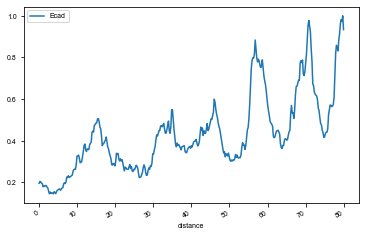

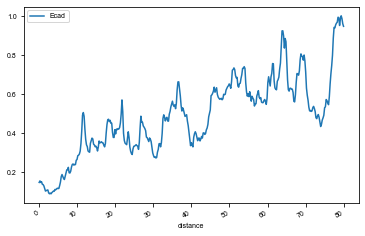

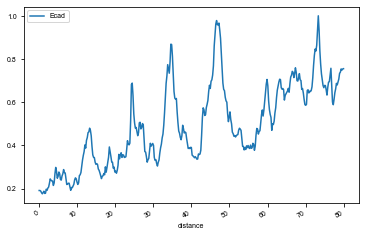

In [2]:
data_folder = '../data/SMG-E-cadherin-gradient-quantification-line-scan-output/'
file_list = glob.glob(data_folder + "190713*.txt")
file_list

dfList = []
for i, f in enumerate(file_list):
    df = pd.read_csv(f)
    df.columns = ['distance', 'Ecad']
    df = df[df.distance <= 80] # keep the line scan profile data only up to 50 um
    df.reset_index()
    df.Ecad = df.Ecad / df.Ecad.max()
    df['id_file'] = np.repeat(i, len(df))
    dfList.append(df)

df_all = pd.concat(dfList)
df_all.reset_index()
# df_all.head()
# df_all.tail()
# df_all.shape

by_id = df_all.groupby('id_file')
by_id.plot(x='distance', y='Ecad', subplots=True)


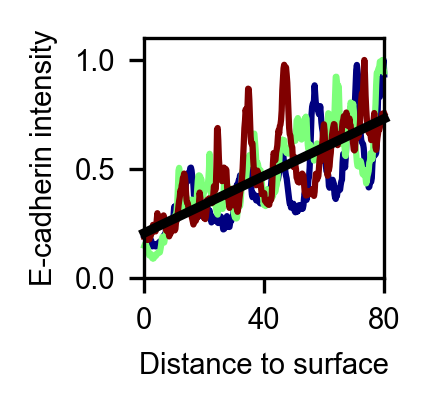

In [3]:
fig = plt.figure(figsize=(1.0, 1.0), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

sns.lineplot(x='distance', y='Ecad', data=df_all, hue='id_file', estimator='mean', ci=95, palette='jet', legend=False)
sns.regplot(x='distance', y='Ecad', data=df_all, x_bins=80, color='k', scatter=False)

plt.xticks([0, 40, 80])
plt.yticks([0, 0.5, 1.0])
plt.ylim([0,1.1])

plt.xlabel("Distance to surface")
plt.ylabel("E-cadherin intensity")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig('../jupyter_figures/' + 'Ecad-gradient-190713-dataset.svg')